# 1. Analisis Untuk mengetahui Kategori Kismis(Raisin)

Link menuju website yang sudah kami buat atau hosting : 

Untuk Extrasi Gambar : https://mrtopeng.pythonanywhere.com/

Untuk Klasifikasi : http://raisin.bmcwaterpool.my.id/

<img src="image-20240501-154910.png" width="" align="" />

### Tujuan Analisis Penyortiran Kategori Jenis Kismis Untuk Bisnis Industri:

Jadi Tujuan Dari Analisis ini bertujuan untuk pengembangan sistem penyortiran Industri makanan, terutama yang bergerak dalam produksi dan pengolahan kismis, sering menghadapi tantangan dalam identifikasi dan pemisahan kategori kismis. Proses manual yang sebelumnya digunakan seringkali memakan waktu, mahal, dan tidak sepenuhnya akurat. Selain itu, kualitas hasil identifikasi dapat bervariasi bergantung pada tingkat keahlian dan pengalaman personel yang terlibat.

### Apa Itu Kismis ?

Sebelum kita masuk proses selanjutnya kita harus mengenal apa itu kismis. Kismis adalah buah kering yang dihasilkan dari pengeringan anggur, khususnya varietas anggur beri yang kecil dan manis. Proses pembuatan kismis melibatkan pengeringan anggur segar, yang kemudian menghasilkan buah yang kecil, manis, dan berwarna gelap. Kismis sering digunakan sebagai camilan atau bahan tambahan dalam berbagai resep makanan dan minuman, karena memiliki rasa manis alami dan tekstur yang kenyal.

Pengeringan merupakan metode pengawetan buah yang lama dan hemat biaya. Proses pengeringan anggur agar dapat menjadi kismis dapat dilakukan dengan beberapa cara, seperti pengeringan di pohon, pengeringan terbuka, pengeringan dalam ruang terkendali, dan pengeringan dalam gudang. Proses pengeringan ini dipengaruhi oleh faktor-faktor seperti variasi anggur, usia anggur, kondisi tanah dan iklim, manajemen pertanian, dan lain-lain. Semua faktor ini berkontribusi pada kualitas akhir produk anggur. Selain itu, parameter fisik dan kimia dari anggur yang baru dipanen juga mempengaruhi kualitas kismis yang dihasilkan. Kualitas mikrobiologis juga merupakan hal penting dalam menciptakan produk anggur yang sehat. Hal" tersebut dapat kita gunakan juga untuk mengetahui kategori kismis nantinya.

Terdapat berbagai metode untuk menilai kualitas dari kismis. Di antaranya adalah metode tradisional yang dilakukan secara manual oleh manusia. Akan tetapi, metode tradisional cenderung memakan waktu yang lama dan berpotensi terjadinya human error. Untuk mengatasi hal tersebut, berbagai peneliti kemudian mengembangkan metode alternatif untuk mengevaluasi kualitas kismis dengan machine vision system (Mollazade et al., 2012; Karimi et al., 2017; Cinar et al., 2020). Pengembangan metode ini diharapkan dapat menjadi dasar pengembangan sistem penyortiran kismis untuk meningkatkan efisiensi di industri. Dibawah ini Gambar dari  machine vision system.

<img src="image-20240512-211828.png" width="50%" align="" />

Referensi Sumber Penjelasan : https://dergipark.org.tr/tr/download/article-file/1227592

Setelah Memahami dan mengerti Kismis itu apa mulai dari darimana asalnya, cara mengolahnya sampai bisa digunakan untuk apa aja buah kismis ini. Kita langsung ketahap Data Understanding atau memahami datasets kismis untuk proses klasifikasi.

# 2. Data Understanding / Memahami data kismis

Data understanding adalah salah satu tahapan dalam proses analisis data yang bertujuan untuk memahami data yang akan diolah sebelum langkah-langkah analisis lebih lanjut dilakukan. Dalam tahap ini, fokus utamanya adalah untuk mengumpulkan informasi tentang data, mengeksplorasi karakteristiknya, dan memahami konteksnya. Pada Analisis kali ini case kita yakni memahami datasets Raisin namun sebelumnya kita harus mengambil datasets dulu supaya data itu pasti apa yang akan kita pahami dan lakukan proses klasifikasi.

## Pengumpulan Data

### Mencari Datasets

Langkah pertama pada pegumpulan data adalah dengan mencari dataset yang akan kita gunakan, sesuai penjelasan di atas kita akan menggunakan Dataset Raisin yang bersumber dari UCI Datasets :

Sumber Datasets Raisin : https://archive.ics.uci.edu/dataset/850/raisin

### Mengambil dan Menampilkan Datasets

Setelah menentukan Datasets langkah selanjutnya yakni menampilkan atau mengambil datasets tersebut.

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
raisin = fetch_ucirepo(id=850) 
  
# data (as pandas dataframes) 
data = raisin.data.original 
  # menyimpan hasil komputasi ke dalam csv
data.to_csv("raisin.csv", index=True)
print(data.info()) #untuk menampilkan info fitur-fitur yang ada di tabel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB
None


In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
raisin = fetch_ucirepo(id=850) 

# data (as pandas dataframes) 
raisin_fitur=raisin.data.features
raisin_class=raisin.data.targets

df_raisin=raisin_fitur.join(raisin_class)

df_raisin.to_csv("raisin.csv", index=False)

#variable features
print(df_raisin)


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
      Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   



Jadi, kode tersebut digunakan untuk mengambil dataset "Raisin" dari UCI Machine Learning Repository, memisahkan fitur-fiturnya dan target variabelnya, menggabungkannya menjadi satu DataFrame, menyimpan DataFrame tersebut ke dalam file CSV, dan mencetak DataFrame tersebut. Data diatas akan kita gunakan untuk Analisis Kasus kali ini, maka sebelum kita melakukan proses selanjutnya kita harus memahami datasets tersebut untuk klasifikasi kategori dari kismis.

### Memahami Data

Deskripsi Penjelasan datasets, Pada Dataset ini menjelaskan bahwa kismis adalah buah kering yang dihasilkan dari pengeringan anggur, khususnya varietas anggur beri yang kecil dan manis. Proses pembuatan kismis melibatkan pengeringan anggur segar, yang kemudian menghasilkan buah yang kecil, manis, dan berwarna gelap. Kismis sering digunakan sebagai camilan atau bahan tambahan dalam berbagai resep makanan dan minuman, karena memiliki rasa manis alami dan tekstur yang kenyal. Studi kasus kali ini untuk mengetahui jenis Kismis yang ada dalam data yang kita ambil dari data uci repository. Data yang kita gunakan yaitu ada 7 fitur yaitu : Area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, Extent, Perimeter dan 2 kelas yaitu Kecimen dan Besni. Kualitas dari data Raisin Setiap fitur dari data tersebut memiliki 900 data dari UCI Datasets hasil dari mesin sortir dari Penelitian Di Turkey, 450 yaitu termasuk kelas kecimen dan 450 kelas besni. Data tidak memiliki missing values tapi memiliki Outlier sebanyak 207. Berikut penjelasan tentang fitur pada data raisin ini.

### Segmentasi

Sample Gambar Kismis :

<img src="image-20240529-175906.png" width="50%" align="left" />

1. Area:

<img src="image-20240529-100709.png" width="50%" align="left" />

Deskripsi: Jumlah piksel yang terdapat di dalam batas-batas raisin. Jumlah piksel dalam batas butir kismis menunjukkan ukuran atau luas dari butir kismis tersebut. Semakin besar nilai area yang dihitung, semakin besar ukuran butir kismis. Untuk menghitung ukuran ini, kita perlu menghitung luas dari setiap butir kismis dengan cara menjumlahkan semua piksel yang ada di dalam butir tersebut. Setiap piksel yang terhitung akan menambah total luas area butir kismis.

<img src="image-20240529-174620.png" width="75%" align="left" />

Tipe Data: Numerik.
Ukuran: Satuan piksel persegi.

Fungsi yang dipakai pada implementasi Extract Features Untuk Area : 

moments['m00'] Digunakan Menghitung Luas Objek: m00 memberikan luas dari objek dalam gambar. Misalnya, dalam gambar biner, m00 adalah jumlah piksel dengan nilai 1 (menunjukkan objek) dalam gambar.

2. MajorAxisLength:

<img src="image-20240529-100810.png" width="50%" align="left" />

Deskripsi: Panjang sumbu utama yaitu garis terpanjang yang dapat ditarik pada kismis. Mengukur lingkaran dilakukan dengan menghitung jarak antara batas butir kismis dan piksel di sekitarnya. Ini memberikan informasi tentang ukuran "utama" atau "panjang" dari butir kismis. Nilai yang lebih tinggi menunjukkan bahwa butir kismis cenderung memiliki bentuk yang lebih panjang atau memanjang. Dengan demikian, semakin besar nilai yang dihasilkan, semakin panjang atau membujur bentuk butir kismis tersebut.

<img src="image-20240529-174507.png" width="75%" align="left" />

Tipe Data: Numerik (continues)
Ukuran: Satuan piksel.

 Fungsi yang dipakai pada implementasi Extract Features Untuk Major Axis Length : 

major_axis_length = moments['mu20'] ** 0.5

3. MinorAxisLength:

<img src="image-20240529-100851.png" width="50%" align="left" />

Deskripsi: Panjang sumbu kecil yang merupakan garis terpendek yang dapat ditarik pada kismis. Yakni Mengarah pada panjang sumbu minor dari setiap butir kismis dalam dataset, sumbu minor adalah salah satu sumbu dari elips yang mewakili bentuk geometris butir kismis. Ini memberikan informasi tentang ukuran "minor" atau "lebar" dari butir kismis. Nilai yang lebih rendah menunjukkan bahwa butir kismis cenderung memiliki bentuk yang lebih bulat. Oleh karena itu, semakin kecil nilai sumbu minor, semakin bulat dan lebih lebar bentuk butir kismis tersebut, menunjukkan proporsi yang lebih seragam.

<img src="image-20240529-174723.png" width="75%" align="left" />

Tipe Data: Numerik (Continue)
Ukuran: Satuan piksel.

Fungsi yang dipakai pada implementasi Rumus Extract Features Untuk Minor Axis Length :  

minor_axis_length = moments['mu02'] ** 0.5

4. Eccentricity:

<img src="image-20240529-101442.png" width="50%" align="left" />

Deskripsi: Eksentrisitas, Ukuran eksentrisitas elips yang memiliki momen yang sama dengan kismis. Di antara 0 dan 1, di mana nilai 0 menunjukkan elips sempurna dan nilai mendekati 1 menunjukkan elips yang sangat memanjang.


<img src="image-20240530-073143.png" width="75%" align="left" />

Tipe Data: Numerik
Ukuran: Tidak memiliki satuan karena merupakan perbandingan.

Fungsi yang dipakai pada implementasi Rumus Extract Features Untuk Eccentricity : eccentricity = ((moments['mu20'] - moments['mu02']) ** 2 + 4 * moments['mu11'] ** 2) ** 0.5 / (moments['mu20'] + moments['mu02'])

5. ConvexArea:

<img src="image-20240529-175609.png" width="50%" align="left" />

Deskripsi: Luas daerah raisin yang melingkupi bentuk kismis secara konveks. Mengarah pada luas area terkecil yang dapat menutupi setiap butir kismis dalam dataset dengan poligon konveks. Ini memberikan informasi tentang "area minimal" yang dibutuhkan untuk menutupi butir kismis dengan poligon konveks. Area minimal ini bisa memberikan indikasi tentang kompleksitas bentuk butir kismis. Semakin besar luas area minimal, semakin kompleks atau tidak beraturan bentuk butir kismis tersebut. Sebaliknya, bentuk yang lebih sederhana atau bulat akan membutuhkan area yang lebih kecil untuk ditutupi dengan poligon konveks.

<img src="image-20240529-174949.png" width="75%" align="left" />

Tipe Data: Numerik.
Ukuran: Satuan piksel persegi.

Fungsi yang dipakai pada implementasi Rumus Extract Features Untuk Convex Area :  

convex_area = cv2.contourArea(cv2.convexHull(largest_contour))

6. Extent:

<img src="image-20240529-175705.png" width="50%" align="left" />

Deskripsi: Rasio luas kismis terhadap luas persegi yang melingkupinya. Mengarah ke ukuran yang menggambarkan seberapa banyak area dari suatu objek yang tertutup oleh kontur objek tersebut. Dalam konteks butir kismis, extent memberikan informasi tentang seberapa "penuh" atau "kompleks" butir kismis tersebut. Nilai extent berkisar antara 0 dan 1, di mana nilai 1 menunjukkan bahwa seluruh area butir kismis tertutup oleh kontur, sementara nilai yang lebih rendah menunjukkan bahwa ada bagian dari area butir kismis yang tidak tertutup atau memiliki "lubang" di dalamnya. Dengan kata lain, semakin rendah nilai extent, semakin besar kemungkinan adanya bagian kosong atau celah dalam butir kismis, sehingga mengindikasikan tingkat kompleksitas atau ketidaksepenuhan butir tersebut.

<img src="image-20240529-175116.png" width="75%" align="left" />

Tipe Data: Numerik (Continuous)
Ukuran: Tidak memiliki satuan karena merupakan perbandingan.

Fungsi yang dipakai pada implementasi Rumus Extract Features Untuk Extent :  

extent = area / convex_area

7. Perimeter:

<img src="image-20240529-175747.png" width="50%" align="left" />

Deskripsi: Panjang keliling kismis. Sebuah objek dalam konteks citra digital mengacu pada panjang lengkung luar dari kontur objek tersebut. Dalam kasus butir kismis, perimeter mengukur total panjang dari semua garis yang membentuk batas butir kismis tersebut. Panjang ini memberikan informasi tentang "kompleksitas" atau "detail" dari batas butir kismis. Semakin tinggi nilainya, semakin kompleks batas butir kismisnya, karena lebih banyak garis yang membentuk kontur butir tersebut, menunjukkan adanya lebih banyak detail pada batas butir kismis.

<img src="image-20240529-175204.png" width="50%" align="left" />

Tipe Data: Numerik (Continuous)
Ukuran: Tidak memiliki satuan karena merupakan perbandingan.

Class: Kelas target dari raisin, yaitu jenis Kecimen atau Besni.
Tipe Data: Categorical

Fungsi yang dipakai pada implementasiRumus Extract Features Untuk Perimeter : 

perimeter = cv2.arcLength(largest_contour, True)

Dari 7 fitur diatas terdapat 1 Class yang digunakan untuk kategori jenis Kismis tersebut yakni Besni dan kecimen dibawah ini Penjelasan dan perbedaan Kategori dari Class Kismis.

Perbedaan & Penjelasan 2 Kategori Kismis :

Kismis Kecimen: Kismis kecimen umumnya lebih kecil dan lebih padat dibandingkan dengan kismis besni. Mereka biasanya memiliki ukuran sekitar 0,5 cm hingga 1 cm dalam diameter. Kismis Kecimen adalah variasi kismis dengan ukuran yang lebih kecil dari kismis biasa, sering kali diproduksi dari varietas anggur yang lebih kecil. Meskipun ukurannya kecil, kismis kecimen memiliki beragam penggunaan dalam berbagai jenis hidangan. Pertama-tama, mereka dapat dinikmati secara langsung sebagai camilan sehat atau dicampur dengan kacang-kacangan atau granola untuk menambahkan rasa manis alami. Selain itu, kismis kecimen sering digunakan sebagai penyedap dalam hidangan seperti salad, muesli, atau yogurt. Mereka juga sering diolah dalam resep makanan, seperti roti, kue, atau hidangan kari, untuk memberikan sentuhan manis yang lezat.

Kismis Besni: Kismis besni cenderung lebih besar dan lebih berair daripada kismis kecimen. Ukurannya bisa bervariasi dari sekitar 1 cm hingga lebih dari 2 cm dalam diameter. Kismis Besni adalah varietas kismis yang berasal dari wilayah Besni di Turki. Kismis ini dikenal karena memiliki rasa yang manis dan tekstur yang kenyal. Karena kualitasnya yang unggul, kismis Besni sering dicari oleh pecinta kismis di seluruh dunia. Mereka digunakan dalam berbagai cara yang mirip dengan kismis kecimen dan kismis lainnya. Kismis Besni dapat dimakan langsung sebagai camilan, dicampur ke dalam berbagai hidangan seperti salad, muesli, atau yogurt, atau digunakan dalam berbagai resep makanan seperti roti, kue, atau hidangan kari. Kualitasnya yang tinggi membuat kismis Besni menjadi pilihan yang populer di dapur rumah tangga maupun industri makanan dan minuman.

## Explore / Mengetahui Kualitas Datasets Raisin dan memahami

Dari Explore data raisin yang kita dapatkan kualitas dari data Raisin Setiap fitur dari data tersebut memiliki 900 data dari UCI Datasets hasil dari mesin sortir dari Penelitian Di Turkey, 450 yaitu termasuk kelas kecimen dan 450 kelas besni. Data tidak memiliki missing values tapi memiliki Outlier sebanyak 207 dan tidak perlu dihapus untuk outlier nya karena data outlier tersebut masih terakomodasi untuk menentukan sebuah kategori kismis. Setelah kita menampilkan data dan mengetahui Penjelasan dari pemahaman fitur dari datasets tersebut kiti bisa menampilkan Lebih secara rinci informasi atau pemahaman dari dataset Raisin tersebut. selanjutnya untuk memahami dan mengetahui lebih dalam, kita detail kan untuk Spesifikasi atau fitur dan Class yang ada pada datasets, seperti mengetahui tipe data nya, mengetahui jumlah data nya, jumlah fitur dan classnya. Dibawah ini adalah Spesifikasi Detail dari datasets. 

### Jumlah Data Fitur dan Tipe Data

In [ ]:
df_raisin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


Bisa kita ketahui dari hasil output code tersebut dalam datasets terdapat 900 data masing-masing 7 Features dan 1 Class disana juga mengecek tipedata dari setiap Kolom atau fiturnya. 

### Jumlah Data Dari Datasets Raisin

In [ ]:
num_data = df_raisin.shape[0]
print("Jumlah data dalam dataset Raisin:", num_data)

Jumlah data dalam dataset Raisin: 900


Diatas sudah bisa kita ketahui bahwa datasets record nya sebanyak 900 data.

### Jumlah Class pada data / Kategori setiap Class

Jadi kita melakukan pengecekan terhadap data Raisin berpakah masingmasing Class atau kategori dari 2 Kategori yakni Kecimen dan Besni. Dibawah ini adalah code untuk menampilkannya.

In [ ]:
df_raisin.groupby('Class').size()

Class
Besni      450
Kecimen    450
dtype: int64

Seperti hasil output diatas menghasilkan masing-masing Class Kategorinya menghasilkan data yang seimbang yakni 450 data per Kategorinya.

1. Besni = 450 Data Record .

2. Kecimen = 450 Data Record.

### Deskripsi Datasets

In [ ]:
# Deskripsi Dari Datasets Raisin
des = df_raisin.describe()
print("Deskripsi Data Raisin:")
print(des)

Deskripsi Data Raisin:
                Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count     900.000000       900.000000       900.000000    900.000000   
mean    87804.127778       430.929950       254.488133      0.781542   
std     39002.111390       116.035121        49.988902      0.090318   
min     25387.000000       225.629541       143.710872      0.348730   
25%     59348.000000       345.442898       219.111126      0.741766   
50%     78902.000000       407.803951       247.848409      0.798846   
75%    105028.250000       494.187014       279.888575      0.842571   
max    235047.000000       997.291941       492.275279      0.962124   

          ConvexArea      Extent    Perimeter  
count     900.000000  900.000000   900.000000  
mean    91186.090000    0.699508  1165.906636  
std     40769.290132    0.053468   273.764315  
min     26139.000000    0.379856   619.074000  
25%     61513.250000    0.670869   966.410750  
50%     81651.000000    0.707367  1119.5

Kode diatas Menunjukkan deskripsi atau  rangkuman statistik deskriptif dari DataFrame dibawah ini penjelasan detailnya :

1. Count: Menunjukkan jumlah entri non-null di setiap kolom. Dalam hal ini, terdapat 900 entri untuk setiap kolom.
2. Mean: Merupakan nilai rata-rata dari setiap kolom. Misalnya, rata-rata kolom pertama adalah 87804.127778, kolom kedua adalah 430.929950, dan seterusnya.
3. Std (Standard Deviation): Menunjukkan seberapa jauh data tersebar dari nilai rata-rata. Standar deviasi yang lebih tinggi menunjukkan variabilitas yang lebih besar dalam data. Semakin kecil nilainya, semakin dekat data dengan nilai rata-rata.
4. Min (Minimum): Nilai minimum dalam setiap kolom. Ini adalah nilai terkecil dalam data.
5. 25th Percentile (Q1): Nilai yang membagi data menjadi dua bagian. Sebanyak 25% data berada di bawah nilai ini. Juga dikenal sebagai kuartil pertama.
6. 50th Percentile (Median/Q2): Nilai yang membagi data menjadi dua bagian yang sama besar. Juga dikenal sebagai median atau kuartil kedua.
7. 75th Percentile (Q3): Nilai yang membagi data menjadi dua bagian. Sebanyak 75% data berada di bawah nilai ini. Juga dikenal sebagai kuartil ketiga.
8. Max (Maximum): Nilai maksimum dalam setiap kolom. Ini adalah nilai terbesar dalam data.

## Identifikasi Kualitas Data

Identifikasi data ada beberapa tahap yakni mulai dari pengecekan atau deteksi data tersebut apakah terdapat Data Duplikat, Missing Value, dan Outlier.Jika terdapat duplikasi data maka kita bisa menghapusnya. Jika terdapat missing value kita juga dapat melakukan proses imputasi data yang null atau missing dengan beberapa metode yakni metode Knn dan Mean. Lalu Tahap selanjutnya kita melakukan Deteksi Outlier jika terdapat data outlier yang terlalu jauh. Meskipun terdeteksi adanya outlier namun model dianggap dapat mengakomodasinya sehingga outlier tidak dihilangkan. Maka dibawah ini urutan tahapan Preprocessing Data :

1. Deteksi Data Missing Values

2. Deteksi Data Outlier

3. Deteksi Duplikasi Data

### 1. Deteksi Data Missing Values

Code dibawah ini melakukan pengecekan apakah terdapat data missing values dan dimunculkan jumlahnya masing-masing disetiap fiturnya.

In [ ]:
import pandas as pd

# Melakukan pengecekan apakah terdapat missing value dalam setiap kolom
missing_val = df_raisin.isnull().sum()

# Menampilkan berapa jumlah adanya missing value untuk setiap kolomnya
print("Jumlah nilai yang hilang untuk setiap kolom:")
print(missing_val)

# Melakukan pengecekan apakah ada nilai null atau missing value
if missing_val.sum() == 0:
    print("Tidak ada missing value.")
else:
    print("Terdapat missing value dalam dataset.")

Jumlah nilai yang hilang untuk setiap kolom:
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64
Tidak ada missing value.


Dari hasil pengecekan data diatas dapat kita simpulkan bahwasannya tidak terdapat adanya missing value pada data (Raisin). Maka dari hasil tersebut kita tidak perliu melakukan Proses imputasi data missing value.

### 2. Deteksi Data Outlier

Disini kita mempunyai 2 cara untuk deteksi outlier yakni Interquartile Range (IQR) dan Local Outlier Factor (LOF) berikut penjelasan dari2 cara atau metode untuk data outlier.

1. Interquartile Range (IQR):

- IQR adalah metode statistik sederhana untuk mendeteksi outlier. Ini didasarkan pada rentang interkuartil (selisih antara kuartil ketiga dan kuartil pertama).

- Titik data dianggap sebagai outlier jika berada di bawah Q1 - 1.5IQR atau di atas Q3 + 1.5IQR, di mana Q1 adalah kuartil pertama (25th percentile) dan Q3 adalah kuartil ketiga (75th percentile).

2. Local Outlier Factor (LOF):

- LOF adalah metode yang mengukur kepadatan lokal dari titik data untuk menentukan seberapa jauh titik tersebut dari tetangganya. Ini sangat efektif dalam mendeteksi outlier dalam dataset yang memiliki kluster atau distribusi yang kompleks.

- LOF menggunakan parameter n_neighbors untuk menentukan berapa banyak tetangga yang akan digunakan untuk menghitung kepadatan lokal, dan contamination untuk menentukan proporsi outlier dalam dataset.

Code dibawah ini melakukan pengecekan apakah terdapat data outlier dan dimunculkan jumlahnya masing-masing di setiap fiturnya.

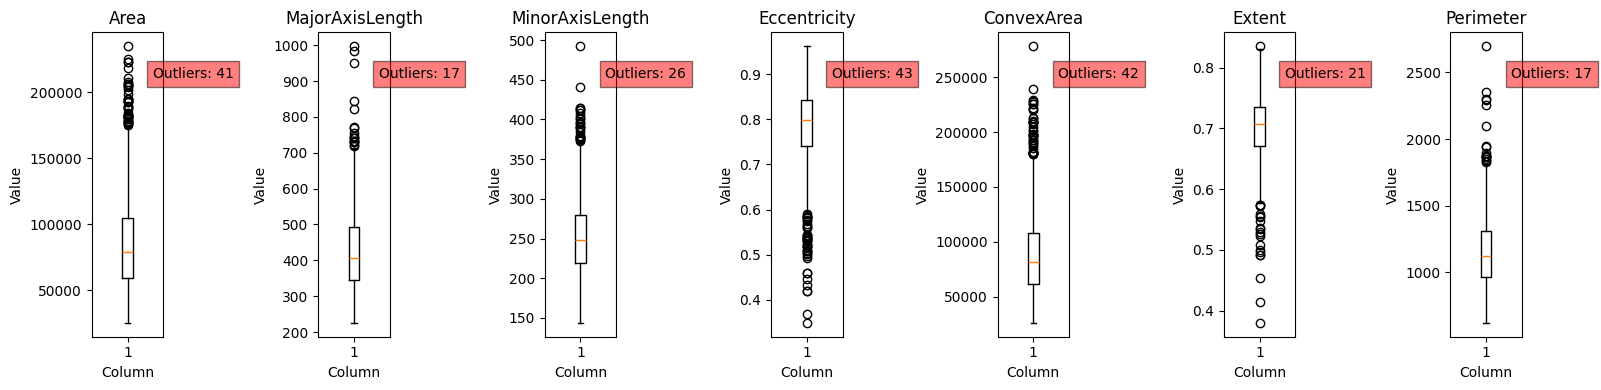

Jumlah Data Outlier Setiap Kolom Fiturnya:
Area               41
MajorAxisLength    17
MinorAxisLength    26
Eccentricity       43
ConvexArea         42
Extent             21
Perimeter          17
dtype: int64
Total Jumlah Data Outlier: 207


In [ ]:
import matplotlib.pyplot as plt

# Mendefinisikan kolom-kolom yang ingin diamati
columns = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']

# Menghitung IQR untuk setiap kolomnya
Q1 = df_raisin[columns].quantile(0.25)
Q3 = df_raisin[columns].quantile(0.75)
IQR = Q3 - Q1

# Menentukan ambang outlier
outlier_threshold = 1.5

# Identifikasi outlier di setiap kolomnya
outliers = ((df_raisin[columns] < (Q1 - outlier_threshold * IQR)) | (df_raisin[columns] > (Q3 + outlier_threshold * IQR)))

# Menghitung jumlah outlier di setiap kolom
num_outliers = outliers.sum()

# Buat boxplot untuk setiap kolom dengan outlier
fig, axs = plt.subplots(1, len(columns), figsize=(16, 4))

# Iterasi setiap kolom dan plot boxplot
for i, column in enumerate(columns):
    axs[i].boxplot(df_raisin[column])
    axs[i].set_title(column)
    axs[i].set_xlabel('Column')
    axs[i].set_ylabel('Value')
    axs[i].text(0.85, 0.85, f'Outliers: {num_outliers[column]}', transform=axs[i].transAxes, bbox=dict(facecolor='red', alpha=0.5))

plt.tight_layout()
plt.show()

# Tampilkan jumlah outlier di setiap kolom
print("Jumlah Data Outlier Setiap Kolom Fiturnya:")
print(num_outliers)
total_outliers = num_outliers.sum()
print("Total Jumlah Data Outlier:", total_outliers)


Pada Kode diatas mengahasilkan output data Outlier sejumlah 207 data dari semua kolom fitur datasets. Namun Meskipun terdeteksi adanya outlier namun model dianggap dapat mengakomodasinya sehingga outlier tidak dihilangkan. Jadi kita tidak perlu melakukan penghapusan data Outlier kita langsung ke proses Modelling. Setelah melakukan proses Preprocecing kita langsung ke Metode Modelling Yakni Gaussian Naives Bayes.

Referensi Informasi : https://journal.lppmunindra.ac.id/index.php/JOTI/article/download/13951/5553

OUTLIER
Outlier ditemukan pada baris => 335, pada kolom fitur => ConvexArea
Outlier ditemukan pada baris => 382, pada kolom fitur => Extent
Outlier ditemukan pada baris => 741, pada kolom fitur => MinorAxisLength
Outlier ditemukan pada baris => 395, pada kolom fitur => MajorAxisLength
Outlier ditemukan pada baris => 192, pada kolom fitur => Perimeter
Outlier ditemukan pada baris => 15, pada kolom fitur => Area
Outlier ditemukan pada baris => 34, pada kolom fitur => MinorAxisLength
Outlier ditemukan pada baris => 506, pada kolom fitur => ConvexArea
Outlier ditemukan pada baris => 487, pada kolom fitur => Extent
Outlier ditemukan pada baris => 192, pada kolom fitur => MinorAxisLength
Outlier ditemukan pada baris => 880, pada kolom fitur => MajorAxisLength
Outlier ditemukan pada baris => 836, pada kolom fitur => Extent
Outlier ditemukan pada baris => 880, pada kolom fitur => Extent
Outlier ditemukan pada baris => 459, pada kolom fitur => ConvexArea
Outlier ditemukan pada baris => 59, pada

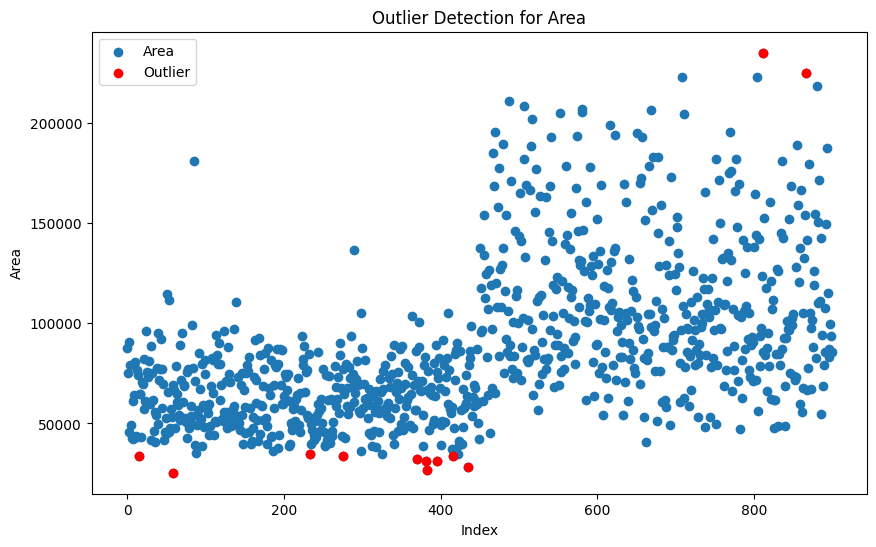

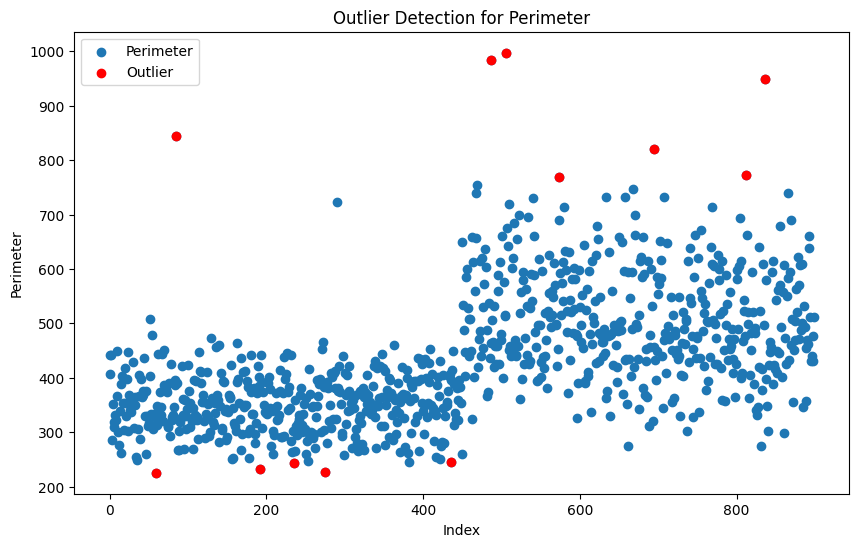

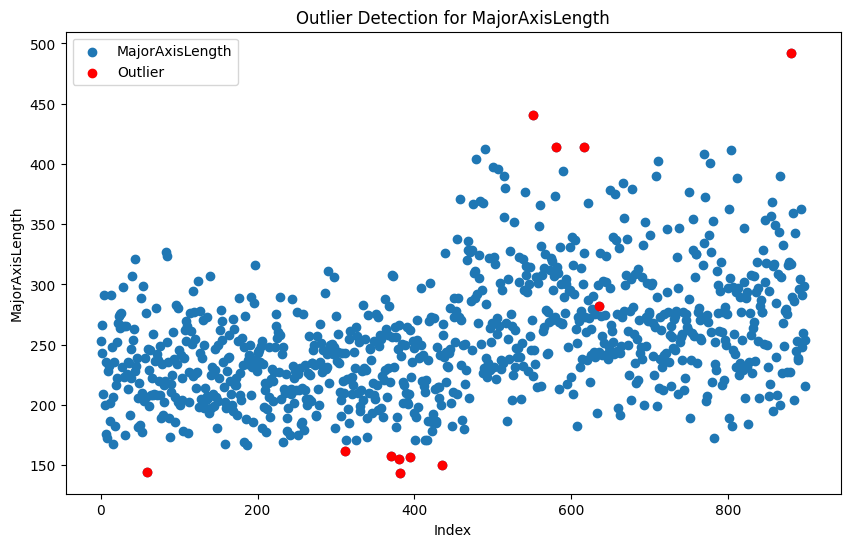

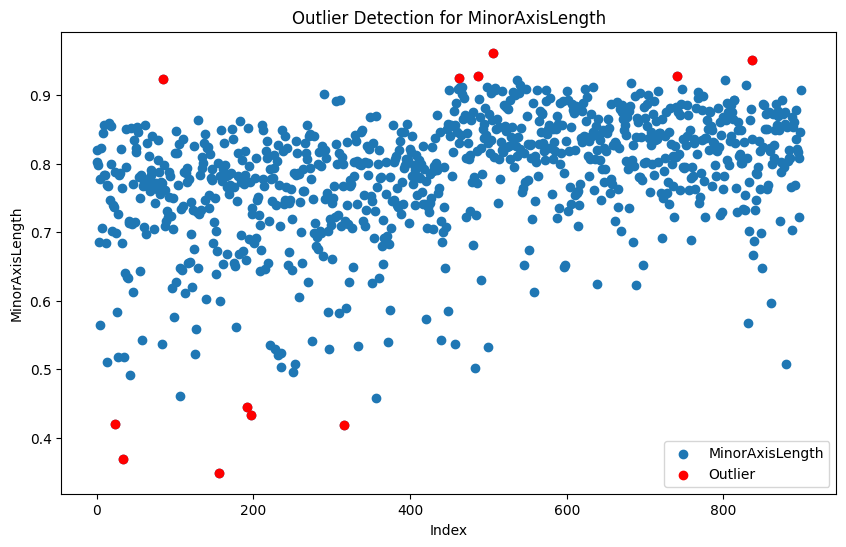

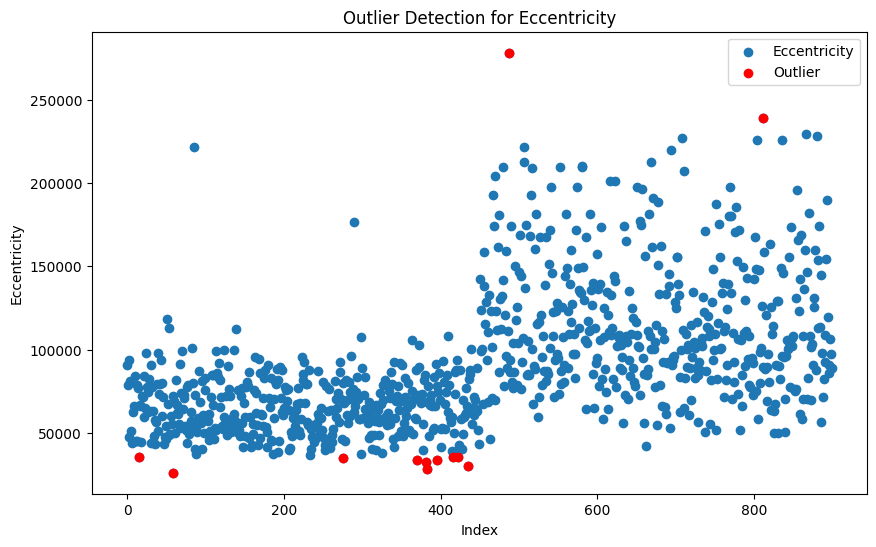

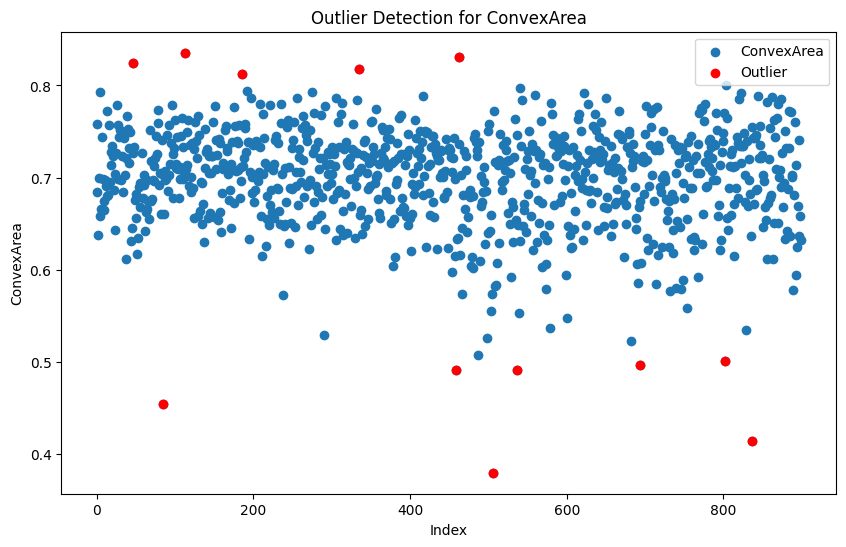

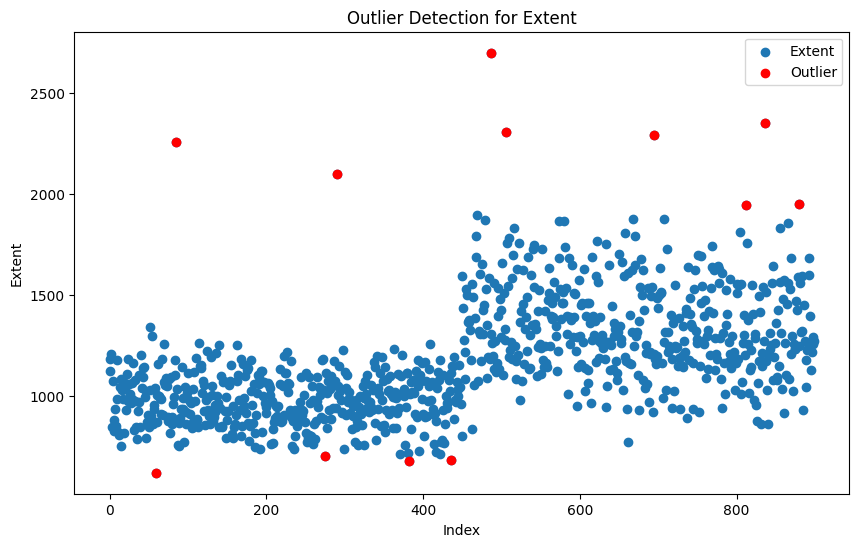

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

# Fetch dataset directly from UCIML repository
raisin = fetch_ucirepo(id=850)

# Extract features and targets
raisin_fitur = raisin.data.features
raisin_class = raisin.data.targets

# Define feature names and target name
feature_names = ["Area", "Perimeter", "MajorAxisLength", "MinorAxisLength", "Eccentricity", "ConvexArea", "Extent"]
target_name = "Class"

# Create DataFrame from features and target
df_raisin = pd.DataFrame(np.hstack((raisin_fitur, raisin_class.values.reshape(-1, 1))), columns=feature_names + [target_name])

# Create LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.013)

# Predict outliers for each numeric feature
outlier_indices = []
for column in feature_names:
    # Get feature values
    feature_values = df_raisin[column].values.reshape(-1, 1)
    # Predict outliers
    y_pred = lof.fit_predict(feature_values)
    # Add outlier indices to the list
    outlier_indices.extend([(i, column) for i, label in enumerate(y_pred) if label == -1])

# Remove duplicate outlier indices
outlier_indices = list(set(outlier_indices))

# Display found outlier indices
print("OUTLIER")
for i in outlier_indices:
    print(f"Outlier ditemukan pada baris => {i[0]}, pada kolom fitur => {i[1]}")

# Collect row indices that contain outliers
outlier_row_indices = [index[0] for index in outlier_indices]

# Display data on rows containing outliers
outlier_data = df_raisin.iloc[outlier_row_indices]
print("DATA")
print("Data pada baris yang mengandung outlier:")
print(outlier_data)

# Assume you have ground truth labels for outliers
# For example, in this list, value 1 indicates an outlier, and 0 indicates not an outlier
ground_truth_labels = [1 if i in outlier_row_indices else 0 for i in range(len(df_raisin))]

# Generate outlier predictions based on outlier_row_indices
predicted_labels = [1 if i in outlier_row_indices else 0 for i in range(len(df_raisin))]

# Calculate precision
precision = precision_score(ground_truth_labels, predicted_labels)

print("PRECISION")
print(f"Precision: {precision}")

# Visualize outliers for each numeric feature
for column in feature_names:
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(df_raisin[column])), df_raisin[column], label=column)
    outlier_indices_for_column = [i[0] for i in outlier_indices if i[1] == column]
    plt.scatter(outlier_indices_for_column, df_raisin[column].iloc[outlier_indices_for_column], color='r', label="Outlier")
    plt.xlabel("Index")
    plt.ylabel(column)
    plt.title(f"Outlier Detection for {column}")
    plt.legend()
    plt.show()


### 3. Deteksi Duplikasi Datasets

In [ ]:
duplicates = df_raisin.duplicated()
print("Data yang Duplikat:", duplicates.sum())

Data yang Duplikat: 0


Seperti hasil output diatas sudah kita deteksi bahwa tidak adanya duplikasi data, bisa dipastikan bahwa kualitas atas identifikasi data sudah bisa dikatakan baik jadi selanjutnya kita bisa melanjutkan ke tahap Preprocessing Data.

# 3.Preprocessing Data

Pada proses klasifikasi perlu dilakukan pengolahan data awal terlebih dahulu atau biasa disebut preprocessing data. Pada Identifikasi diatas kita  mendeteksi missing value (telah dilakukan diatas) dan diketahui pada dataset tidak terdapat data yang kosong. Kemudian tahap berikutnya adalah mendeteksi outlier. Meskipun terdeteksi adanya outlier namun model dianggap dapat mengakomodasinya sehingga outlier tidak dihilangkan.

Jadi dari hasil identifikasi sebelumnya kita sudah mengetahuinya tidak adanya proses preprocessing data karena data sudah kita identifikasi bahwa data tidak ada terdapat missing value dan outlier tidak perlu dihapus karena masih terakomodasi untuk menentukan kategori kismis. Maka kita tidak perlu melakukan proses imputasi karena tidak adanya missing value dan outlier tidak perlu dihapus langsung saja kita ke tahap Modelling untuk menentukan kategori dari pengelompokan jenis kismis jadi tentunya kita menggunakan Metode Klasifikasi. Dibawah ini.

# 4. Modelling

Proses modelling dalam analisis data adalah langkah penting di mana Anda menggunakan berbagai teknik statistik atau algoritma machine learning untuk memahami, menganalisis, dan/atau memprediksi pola dalam data. Dikarenakan dalam Case Datasets Raisin ini tujuannya untuk menentukan kategori dari pengelompokan jenis kismis jadi tentunya kita menggunakan Metode Klasifikasi.

### Pemilihan Model

Metode Klasifikasi adalah teknik dalam analisis data yang digunakan untuk memisahkan atau mengelompokkan data ke dalam kategori atau kelas berdasarkan atribut-atribut yang ada. Tujuannya adalah untuk membangun model yang dapat memprediksi kelas atau label dari data yang tidak terlihat sebelumnya berdasarkan fitur-fitur yang diamati. Disini kita menggunakan Metode Klasifikasi Naive Bayes dikarenakan cocok digunakan untuk klasifikasi teks dan memiliki kinerja yang baik dalam dataset dengan dimensi tinggi. Kita Langsung saja Implementasikan.

## GAUSSIAN NAIVE BAYES CLASSIFICATION

Gaussian Naive Bayes merupakan sebuah teknik klasifikasi yang digunakan dalam machine learning dengan menggunakan metode probability dan Distribusi Gaussian atau Distiribusi Normal. Gaussian Distribution mengasumsikan bahwa setiap feature pada data memiliki penngaruh yang independent dalam memprediksi target. Kombinasi prediksi dari seluruh parameter adalah prediksi akhir dengan probability dari target variable yang diklasifikasikan ke dalam dua kelas. Klasifikasi akhirnya adalah hasil probability yang lebih tinggi dari grup target maka itu adalah kelas dari suatu data.

### Membagi Data Train & Data Test

Dalam perbandingan studi kasus kita membagi datanya 80% Data Train sedangkan Data Testnya 20%. Hal ini dilakukan agar saat kita melakukan prediksi terhadap data baru, kita mendapat hasil yang lebih efektif. Dan apakah hasil tersebut tepat maka kita langsung saja membagi data tersebut lalu melakukan proses klasifikasi dengan metode NaiveBayes Prediksi dengan bantuan Sklearn Modelling Naives Bayes.

### Data Train

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_raisin[['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity','ConvexArea','Extent','Perimeter' ]]
y = df_raisin['Class']
# Membagi dataset menjadi data latih & data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

trained = X_train.join(y_train)
trained.to_csv('Raisin_train.csv', index=False)

print(trained)

         Area MajorAxisLength MinorAxisLength Eccentricity ConvexArea  \
526   69579.0      224.578516        0.826169      71648.0   0.719386   
96    79661.0      282.739032        0.619209      81032.0   0.779157   
518   64303.0      187.029019        0.906395      67199.0   0.686235   
889   79058.0      236.964252        0.853285      82555.0   0.578256   
767  134913.0      273.092077        0.904265     139500.0   0.736726   
..        ...             ...             ...          ...        ...   
210   49063.0      217.913109        0.673355      50732.0   0.658811   
821  121077.0      302.109185        0.814864     125856.0   0.734512   
855  189069.0      357.047256        0.850816     195810.0   0.612143   
706   60674.0      225.218803        0.758036      62614.0   0.735576   
113   50545.0      227.159717        0.610713      51771.0   0.835455   

       Extent   Perimeter    Class  
526  1071.644  398.596683    Besni  
96   1045.658  360.073447  Kecimen  
518   1081.6

Hasil diatas total data Train yakni 720 record.

### Data Test

In [ ]:
test = X_test.join(y_test)
test.to_csv('Raisin_test.csv', index=False)
print(test)

         Area MajorAxisLength MinorAxisLength Eccentricity ConvexArea  \
80    51220.0      202.508875        0.787599      52903.0   0.692471   
188   69024.0      237.659818        0.770482      70649.0   0.721043   
472  108161.0      286.033191         0.80767     111765.0   0.707906   
872   66938.0      248.674245        0.716206      69880.0   0.708661   
209   49998.0      212.326943        0.710616      50857.0   0.779295   
..        ...             ...             ...          ...        ...   
782   47253.0      172.508389        0.877725      51538.0    0.71132   
173   68627.0         216.894        0.850123      70932.0   0.738242   
449   41995.0      210.350798        0.584337      43443.0   0.729701   
405   50530.0       198.28392        0.797864      52600.0   0.681696   
534  163082.0      302.222447        0.900848     167442.0   0.763779   

       Extent   Perimeter    Class  
80    896.728  328.647605  Kecimen  
188  1015.771  372.821987  Kecimen  
472  1305.14

Hasil diatas total data Test yakni 180 record.

Setelah Membagi Data Train dan data testnya selanjutnya kita bisa langsung ke implementasi prediksi model dengan bantuan Sklearn Naive Bayes.

## Melakukan Prediksi dengan bantuan Sklearn Naive Bayes

Setelah kita melakukan prediksi class data baru dengan perhitungan manual dengan bantuan excel, maka berikutnya kita akan membuktikan apakah prediksi dari hasil perhitungan manual kita benar apa salah dengan cara membuat model melalui bantuan sklearn. Dan berikut untuk Akurasi data nya.

### Hasil Akurasi & Predict Data

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Read data from the CSV file using Pandas
data_raisin = pd.read_csv("raisin.csv")

# Separate features and target labels
X = data_raisin[['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']]
y = data_raisin['Class']

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Combine the training features and labels into a single DataFrame for saving
train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
test_data = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)

# Save the training and testing data to CSV files
train_data.to_csv("Raisin_Train.csv", sep="\t", index=False)
test_data.to_csv("Raisin_Test.csv", sep="\t", index=False)

# Build the Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Train the model using the training data
gnb_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = gnb_model.predict(X_test)

# Evaluate the model
accuracy = round(accuracy_score(y_pred, y_test), 3)
print('Accuracy: ', accuracy)

# Predict the class for a new data point
new_data_point = [[72653, 403.190959, 231.055734, 0.819508, 74718,  0.663898, 1062.070]]
predicted_class = gnb_model.predict(new_data_point)
print('Predicted class for the new data point:', predicted_class)


Accuracy:  0.861
Predicted class for the new data point: ['Kecimen']
/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Hasil diatas menyentuh angka  0,7 - 0,9. Rentang ini sering dianggap sebagai akurasi yang baik. Model dengan akurasi di kisaran ini biasanya dianggap cukup efektif untuk banyak aplikasi. Hasil diatas prediksi dengan perhitunganya yakni Class Kecimen dengan inputan dari data x test yakni [72653, 403.190959, 231.055734, 0.819508, 74718,  0.663898, 1062.070] Hasil Prediksinya Class Kecimen.

Namun seharusnya inputan tersebut masuk kedalam class Besni bukan kecimen, wajar karena accuracy data tidak sepenuhnya 100%, kita bisa mencobanya dengan inputan yang benar hasilnya seperti dibawah ini

## Kesimpulan Hasil Analisis Klasifikasi  :

Dapat kita simpulkan dengan metode klasifikasi Naive Bayes ini dengan nilai prediksi 0.861. Bisa dikatakan sangat bagus untuk menentukan atau sortir Kategori Kismis atau Raisin dari perhitungan dari masing-masing fiturnya hasil dari teknologi machine vision system ini sangat akurat dibanding dengan cara manual oleh manusia yang sering terjadi human error. Dengan hasil analisis dengan Metode Klasifikasi ini hasil dari machine vision system ini dapat membantu sistem penyortiran kismis jenis Besni dan Kecimen untuk meningkatkan efisiensi di industri. 

### Pertemuan Baru dengan Pengembangan Baru Model Baru

## Ensemble Learning

<img src="image-20240612-235103.png" width="50%" align="left" />

Metode ensemble adalah teknik yang menggabungkan beberapa classifier individu untuk membentuk classifier baru, dengan tujuan untuk mencapai hasil yang lebih akurat. Metode ini telah banyak digunakan dalam berbagai penelitian karena terbukti mampu meningkatkan akurasi. Dalam metode ensemble, beberapa classifier individu digabungkan untuk menggabungkan kelebihan masing-masing classifier sehingga kinerja keseluruhan dalam menyelesaikan tugas menjadi lebih baik. Contoh umum dari metode ensemble termasuk bagging, boosting, dan stacking. Namun, dalam kesempatan ini, kami hanya akan menggunakan bagging dan stacking untuk meningkatkan model.

## 2. Stacking Classifier (Meta Classifier)

(Stacked Generalization) adalah teknik pembelajaran ensemble yang bertujuan untuk menggabungkan beberapa model untuk meningkatkan kinerja prediktif. Ini melibatkan langkah-langkah berikut:

1. Model Dasar : Melatih beberapa model pada kumpulan data yang sama.

2. Meta-Model : Melatih model baru untuk menggabungkan prediksi model dasar. Menggunakan prediksi model dasar sebagai fitur masukan untuk model meta.

Keuntungan / Kelebihan nya :

1. Memanfaatkan Keanekaragaman Model : Dengan menggabungkan berbagai jenis model, penumpukan dapat menangkap berbagai pola dalam data.

2. Meningkatkan Performa : Model meta mempelajari cara terbaik untuk menggabungkan prediksi dari model dasar, yang sering kali menghasilkan peningkatan performa dibandingkan model individual.

<img src="image-20240612-184821.png" width="75%" align="" />

Langkah - langkah proses Gambar Stacking Diatas :

1. Persiapan Data: Pisahkan dataset menjadi fitur (X) dan label (y), kemudian bagi dataset menjadi set pelatihan dan pengujian.

2. Latih Model Dasar (Base Models): Latih beberapa model dasar menggunakan data pelatihan.

3. Kumpulkan Prediksi dari Model Dasar: Gunakan model dasar yang telah dilatih untuk membuat prediksi pada set pelatihan dan pengujian.

4. Latih Meta-Classifier:Gunakan prediksi dari model dasar sebagai fitur baru untuk melatih meta-classifier.

5. Evaluasi dan Prediksi: Gunakan meta-classifier untuk membuat prediksi akhir dan evaluasi kinerja model.

Setelah kita memahami dengan baik Stacking classifier dan langkah-langkahnya berikut kita implementasikan.

### A. Meta Predict Classifier Model Naive Bayes Manual

### Model P1

In [ ]:
# Install paket yang diperlukan
!pip install ucimlrepo
# Import library yang diperlukan
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
%matplotlib inline

# Mengambil dataset Raisin
raisin = fetch_ucirepo(id=850)

# Ekstrak fitur dan target sebagai dataframe pandas
raisin_features = raisin.data.features
raisin_class = raisin.data.targets

# Gabungkan fitur dan target menjadi satu dataframe
df_raisin = raisin_features.join(raisin_class)

# Pisahkan fitur dan label
feature_columns = ["Area", "MajorAxisLength", "MinorAxisLength", "Eccentricity", 
                   "ConvexArea", "Extent", "Perimeter"]
X = df_raisin[feature_columns].values
y = df_raisin['Class'].values

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

# Inisialisasi classifier KNN dengan k=3
classifier = KNeighborsClassifier(n_neighbors=3)

# Latih model pada set pelatihan
classifier.fit(X_train, y_train)

# Evaluasi model pada data pelatihan
XTrain1 = classifier.predict(X_train)
print("Accuracy Train:", accuracy_score(y_train, XTrain1))

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_test, y_test)
# Evaluasi model pada data pengujian
XTest1 = classifier.predict(X_test)
print("Accuracy Test:", accuracy_score(y_test, XTest1))

# Prediksi untuk instance baru
new_data = [[81500, 1600.000, 300.000, 0.82156, 41600, 0.7521, 1000.040]]
prediction = classifier.predict(new_data)
print("Prediksi untuk data inputan baru:", label_encoder.inverse_transform(prediction), "Atau" , prediction)


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Accuracy Train: 0.8986111111111111
Accuracy Test: 0.9111111111111111
Prediksi untuk data inputan baru: ['Kecimen'] Atau [1]


### Model P2

In [ ]:
# Import library yang diperlukan
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
%matplotlib inline

# Mengambil dataset Raisin
raisin = fetch_ucirepo(id=850)

# Ekstrak fitur dan target sebagai dataframe pandas
raisin_features = raisin.data.features
raisin_class = raisin.data.targets

# Gabungkan fitur dan target menjadi satu dataframe
df_raisin = raisin_features.join(raisin_class)

# Pisahkan fitur dan label
feature_columns = ["Area", "MajorAxisLength", "MinorAxisLength", "Eccentricity", 
                   "ConvexArea", "Extent", "Perimeter"]
X = df_raisin[feature_columns].values
y = df_raisin['Class'].values

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

# Inisialisasi classifier KNN dengan k=5
classifier2 = KNeighborsClassifier(n_neighbors=5)

# Latih model pada set pelatihan
classifier2.fit(X_train, y_train)

# Evaluasi model pada data pelatihan
XTrain2 = classifier2.predict(X_train)
print("Accuracy Train:", accuracy_score(y_train, XTrain2))

classifier2 = KNeighborsClassifier(n_neighbors=5)
classifier2.fit(X_test, y_test)
# Evaluasi model pada data pengujian
XTest2 = classifier2.predict(X_test)
print("Accuracy Test:", accuracy_score(y_test, XTest2))

# Prediksi untuk instance baru
new_data = [[81500, 1600.000, 300.000, 0.82156, 41600, 0.7521, 1000.040]]
prediction2 = classifier2.predict(new_data)
print("Prediksi untuk data inputan baru:", label_encoder.inverse_transform(prediction2), "Atau" , prediction2)

Accuracy Train: 0.8625
Accuracy Test: 0.8555555555555555
Prediksi untuk data inputan baru: ['Kecimen'] Atau [1]


### Menggabungkan hasil prediksi 2 model

In [ ]:
combined_train_df = pd.DataFrame({
    'P1': XTrain1,
    'P2': XTrain2,
    'Y': y_train
})
# Buat DataFrame gabungan untuk data pengujian
combined_train_df1 = pd.DataFrame({
    'P1': label_encoder.inverse_transform(XTrain1),
    'P2': label_encoder.inverse_transform(XTrain2),
    'Y': label_encoder.inverse_transform(y_train)
})

# Simpan DataFrame ke file CSV untuk data pengujian
combined_train_df.to_csv('combine_train.csv', index=False)
combined_train_df1.to_csv('combine_train1.csv', index=False)

In [ ]:
combined_test_df = pd.DataFrame({
    'P1': XTest1,
    'P2': XTest2,
    'Y': y_test
})
# Buat DataFrame gabungan untuk data pengujian
combined_test_df1 = pd.DataFrame({
    'P1': label_encoder.inverse_transform(XTest1),
    'P2': label_encoder.inverse_transform(XTest2),
    'Y': label_encoder.inverse_transform(y_test)
})

# Simpan DataFrame ke file CSV untuk data pengujian
combined_test_df.to_csv('combine_test.csv', index=False)
combined_test_df1.to_csv('combine_test1.csv', index=False)

Hasil Train

In [ ]:
df = pd.read_csv('combine_train.csv')
(df)

,P1,P2,Y
0,1,1,1
1,1,1,0
2,1,1,1
3,0,0,1
4,1,0,1
...,...,...,...
715,0,0,0
716,1,1,1
717,0,0,0
718,0,0,0


In [ ]:
df = pd.read_csv('combine_train1.csv')
(df)

,P1,P2,Y
0,Kecimen,Kecimen,Kecimen
1,Kecimen,Kecimen,Besni
2,Kecimen,Kecimen,Kecimen
3,Besni,Besni,Kecimen
4,Kecimen,Besni,Kecimen
...,...,...,...
715,Besni,Besni,Besni
716,Kecimen,Kecimen,Kecimen
717,Besni,Besni,Besni
718,Besni,Besni,Besni


Hasil Test

In [ ]:
df = pd.read_csv('combine_test.csv')
(df)

,P1,P2,Y
0,0,0,0
1,1,1,1
2,0,0,1
3,1,1,1
4,0,0,0
...,...,...,...
175,1,0,1
176,1,1,1
177,0,0,0
178,1,1,1


In [ ]:
df = pd.read_csv('combine_test1.csv')
(df)

,P1,P2,Y
0,Besni,Besni,Besni
1,Kecimen,Kecimen,Kecimen
2,Besni,Besni,Kecimen
3,Kecimen,Kecimen,Kecimen
4,Besni,Besni,Besni
...,...,...,...
175,Kecimen,Besni,Kecimen
176,Kecimen,Kecimen,Kecimen
177,Besni,Besni,Besni
178,Kecimen,Kecimen,Kecimen


### Implementasi stacking dengan scikit-learn

Setelah memahami proses stacking classifier untuk meningkatkan model secara manual, langkah berikutnya adalah memanfaatkan library untuk melatih model dasar. Melatih model dasar satu per satu bukanlah solusi praktis, terutama karena kami berencana menggunakan 20 model KNN dengan nilai K yang berbeda. Oleh karena itu, kami akan menggunakan bantuan library untuk mempercepat dan mempermudah proses pelatihan ini. Prediksi dari 20 model tersebut kemudian akan digabungkan dan dimasukkan ke dalam model Gaussian Naive Bayes untuk tahap akhir prediksi. Dengan pendekatan ini, kami berharap dapat mengoptimalkan kinerja model secara keseluruhan.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Load dataset
df = pd.read_csv('raisin.csv')

# Check the first few rows of the dataframe to understand its structure
print(df.head())

# Assuming the 'Class' column is the target and the rest are features
# Modify these column names as per the actual dataset
feature_columns = ["Area", "MajorAxisLength", "MinorAxisLength", "Eccentricity", 
                   "ConvexArea", "Extent", "Perimeter"]
X = df[feature_columns].values
y = df['Class'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create list of estimators for StackingClassifier
estimators = [('knn' + str(i // 3), KNeighborsClassifier(n_neighbors=i)) for i in range(3, 63, 3)]

# Initialize StackingClassifier with GaussianNB as final estimator
clf = StackingClassifier(
    estimators=estimators, final_estimator=GaussianNB()
)

# Train StackingClassifier
clf.fit(X_train, y_train)

# Evaluate accuracy for each KNN model and store the results
accuracies = []
for name, estimator in estimators:
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy:.4f}")
    accuracies.append(accuracy)

# Display accuracy of each KNN model
for model_name, accuracy in zip([name for name, _ in estimators], accuracies):
    print(f"{model_name}: {accuracy:.4f}")

# Evaluate predictions for new data point by each KNN model
# Assuming X_new is a sample point from the raisin dataset
# Modify this sample point as per the actual dataset
# Example new data point with 7 features
X_new = [[3500, 250, 140, 0.7, 3700, 0.45, 650]]

predictions = {}
for name, estimator in estimators:
    pred = estimator.predict(X_new)[0]
    predictions[name] = pred
    print(f"Prediction of {name}: {pred}")

# Counting predictions for each class
unique_classes = np.unique(y)
counts = {cls: sum(1 for pred in predictions.values() if pred == cls) for cls in unique_classes}

# Display number of predictions for each class
for cls, count in counts.items():
    print(f"Class {cls}: {count} predictions")

# Predict for new data using StackingClassifier
prediction = clf.predict(X_new)
print(f'\nPrediction for X_new: {prediction[0]}')

# Evaluate overall performance of the stacking classifier
avg_acc = clf.score(X_test, y_test)
print(f'\nOverall Stacking Classifier Performance:')
print(f'Accuracy: {avg_acc:.4f}')

# Obtain predictions from the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  
Accuracy of knn1: 0.8278
Accuracy of knn2: 0.8444
Accuracy of knn3: 0.8611
Accuracy of knn4: 0.8389
Accuracy of knn5: 0.8333
Accuracy of knn6: 0.8444
Accuracy of knn7: 0.8444
Accuracy of knn8: 0.8444
Accuracy of knn9: 0.8389
Accuracy of knn10: 0.8444
Accuracy of knn11: 0.8389
Accuracy of knn12: 0.8444
Accuracy of knn13: 0.8389
Accuracy of knn14: 0.8444
Accuracy

## 3. Bagging (Bootstrap Aggregating)

<img src="image-20240613-000652.png" width="75%" align="" />

Bagging, kependekan dari agregasi bootstrap, terutama diterapkan dalam klasifikasi dan regresi . Hal ini meningkatkan akurasi model melalui pohon keputusan, sehingga mengurangi varians secara signifikan. Pengurangan varians meningkatkan akurasi, menghilangkan overfitting, yang merupakan tantangan bagi banyak model prediktif. Secara umum untuk masalah regresi. Ini melibatkan pengambilan rata-rata prediksi. Rata-rata yang dihasilkan digunakan sebagai prediksi keseluruhan untuk model gabungan.

Proses Klasifikasi Bagging melibatkan langkah-langkah berikut:

1. Kita mengambil dataset pelatihan awal yang dimiliki.

2. Lalu kita membuat sejumlah m subset data dari set pelatihan. Kami mengambil subset N titik sampel dari dataset awal untuk setiap subset. Setiap subset diambil dengan penggantian. Artinya, titik data tertentu dapat diambil sampelnya lebih dari satu kali.

3. Lalu model yang sama (classifier) diterapkan pada setiap set data pelatihan ini dan menghasilkan prediksi masing-masing.

4. Setiap model membuat prediksi.

5. Terakhir tingga menggabungkan prediksi menjadi satu prediksi. Untuk ini, gunakan max voting atau averaging.

Setelah memahami maka pada percobaan kali ini bagging kami menggunakan 20 gaussian naive bayes yang menerima subset berbeda satu sama lain. Berikut Ini Implementasinya.

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the Raisin dataset
data = pd.read_csv('raisin.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Assuming 'Class' is the target column, separate features and labels
X = data[['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 
          'ConvexArea', 'Extent', 'Perimeter']]
y = data['Class']

# Encode the class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

# Parameters for bagging
n_estimators = 20
n_samples = int(len(X_train) / n_estimators)

# Initialize lists to store models and accuracies
estimators = []
accuracies = []
pred = []

# Data for prediction
X_new = pd.DataFrame([[81500, 1600.000, 300.000, 0.82156, 41600, 0.7521, 1000.040]], 
                     columns=['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 
                              'ConvexArea', 'Extent', 'Perimeter'])

np.random.seed(0)

# Create Gaussian Naive Bayes models for each subset
for i in range(n_estimators):
    # Create a bootstrap sample
    bootstrap_indices = np.random.randint(0, len(X_train), n_samples)
    X_train_bootstrap = X_train.iloc[bootstrap_indices]
    y_train_bootstrap = y_train[bootstrap_indices]
    
    # Train the model
    gnb_model = GaussianNB()
    gnb_model.fit(X_train_bootstrap, y_train_bootstrap)
    estimators.append(gnb_model)
    
    # Evaluate the model
    bebas = gnb_model.predict(X_new)
    pred.append(bebas[0])  # Store the prediction in the list
    print(f"Prediction by estimator {i + 1}: {bebas[0]}")
    y_pred = gnb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Estimator {i + 1} accuracy: {accuracy:.4f}")

# Majority vote for new data prediction
pred_majority_vote = np.bincount(pred).argmax()
print(f"Majority vote prediction for new data: {label_encoder.inverse_transform([pred_majority_vote])[0]}")

# Count the number of predictions for each class
class_counts = np.bincount(pred)
classes = label_encoder.classes_
for i, class_name in enumerate(classes):
    print(f"Jumlah prediksi kelas {class_name}: {class_counts[i] if len(class_counts) > i else 0}")

# Calculate the average accuracy of all estimators
average_accuracy = np.mean(accuracies)
print(f"Average accuracy of all estimators: {average_accuracy:.4f}")


    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  
Prediction by estimator 1: 0
Estimator 1 accuracy: 0.8222
Prediction by estimator 2: 0
Estimator 2 accuracy: 0.8056
Prediction by estimator 3: 0
Estimator 3 accuracy: 0.7667
Prediction by estimator 4: 0
Estimator 4 accuracy: 0.7944
Prediction by estimator 5: 0
Estimator 5 accuracy: 0.7833
Prediction by estimator 6: 0
Estimator 6 accuracy: 0.8333
Prediction by e

## Kesimpulan Hasil Model Yang Didapatkan

Dari ketiga yang kami buat sebelumnya dapat dikatakan baik atau bagus, hal itu dapat dilihat dari akurasi yang didapat dari masing-masing model yang sudah kita buktikan dengan hasil rata-rata diatas 80 % yang artinya tergolong sangat baik sebagai berikut hasilnya.

- single model dengan GNB : mendapatkan akurasi 86,1% atau 0.861.

- stacking dengan KNN (model dasar) dan GNB (model meta) : mendapatkan akurasi 82,278% atau 0.8278.

- bagging dengan GNB : mendapatkan akurasi 83,56% atau 0.8356.

dari ketiga model diatas dapat dilihat bahwa model terbaik adalahsingle model dengan GNB karena mendapatkan akurasi tertinggi dari ketiga model yang telah dibuat yakni 86,1% atau 0.861. Jadi langkah selanjutnya kita pakai model terbaik tersebut untuk implementasinya.

## Deployment Implementasi Model

Pada tahap ini kita akan membuat implementasi Model single model dengan GNB sebagai model untuk menentukan klasifikasi untuk menentukan jenis kismis yang akan digunakan untuk mempermudah untuk penyortiran dalam bisnis pabrik sortir kismis supaya efektif dalam waktu dan tenaga kerja profesional manual yang susah dicari untuk penyortiran.

Dalam Implementasi yang kita buat kita menggunakan Python Flask yang tentunya membutuhkan library flask untuk menjalankannya.

## Implementasi Web 

Tahapan Implementasi Flask untuk Prediksi Kelas Kismis

1. Mengimpor Library yang Diperlukan

2. Inisialisasi Aplikasi Flask

3. Memuat dan Melatih Model

4. Mendefinisikan Rute Utama dan Logika Prediksi

5. Menjalankan Aplikasi Flask

Maka Otomatis Web Flask kita bisa digunakan jika kita sesuaikan tahapan dan code yang kita buat. berikut adalah link implementasi yang sudah kita upload di github berikut linknya :

## Hasil Implementasi Web 

link menuju website yang sudah kami buat atau hosting : http://raisin.bmcwaterpool.my.id/

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bd7bfa42-6d65-487b-b353-2531ed4bd5d7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>